# data preprocessing


In [ ]:
import random
random.seed(1234)

In [ ]:
import os
import numpy as np
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from matplotlib import pyplot
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D, Dropout, MaxPooling2D, Activation, ZeroPadding2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
#load dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#train_images

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)
print(test_images.shape) # (10000, 28, 28)
print(test_labels.shape) # (10000,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


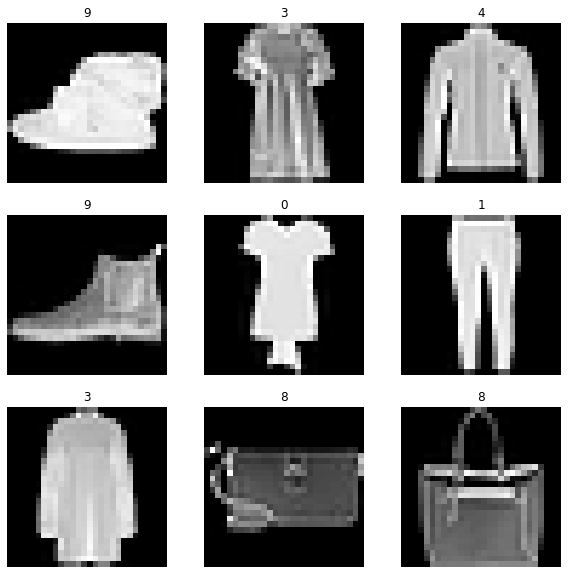

In [ ]:
# Visualizing the MNIST images
sample_img_idx = np.random.randint(0, train_images.shape[0]+1, 9)
plt.figure(figsize=(10,10))
for i, j in enumerate(sample_img_idx):
    image, label = train_images[j], train_labels[j]
    ax=plt.subplot(3,3,i+1)
    plt.imshow(image, cmap=pyplot.get_cmap('gray'))
    plt.title(label)
    plt.axis('off')

In [ ]:
# Normalizing and reshaping the data**
#First, we normalize the image pixel values from [0, 255] to [-0.5, 0.5]. 
#Second, we reshape the images from (28, 28) to (28, 28, 1) to add the third dimension required by Keras

# Normalize the images
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(train_images.shape) # (60000, 28, 28, 1)
print(test_images.shape)  # (10000, 28, 28, 1)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels.shape) # (60000, 10)
print(test_labels.shape)  # (10000, 10)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [ ]:
# inputs for CNN convolutional layers (not flattened)
x_train_img = x_train.reshape(60000,28,28,1)/255
x_test_img = x_test.reshape(10000,28,28,1)/255

In [ ]:
# we need to flatten the images so we can put it into the MLP 
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

In [ ]:
#nomalization 
xmean_train = np.mean(x_train,axis=1).reshape(60000,1)
xmean_test = np.mean(x_test, axis=1).reshape(10000,1)
xstd_train = np.std(x_train,axis=1).reshape(60000,1)
xstd_test = np.std(x_test,axis=1).reshape(10000,1)

# unormalized training data
x_train_unnorm = x_train
x_test_unnorm = x_test
x_train = (x_train - xmean_train)/xstd_train # subtract the mean to center the cloud of data around the origin along every dimension (the data is centered at 0)
x_test = (x_test - xmean_test)/xstd_test

In [ ]:
# change labels from N x 1 to N x C
y_train_C = keras.utils.to_categorical(y_train,10)
y_test_C = keras.utils.to_categorical(y_test,10)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
labels = []
for i in range(len(y_train)):
  labels.append(class_names[y_train[i]])

In [ ]:
count = pd.Series(labels[:]).value_counts()
print(count)

In [ ]:
import seaborn as sns

count.plot.bar(rot=0) 
plt.xticks(rotation ='vertical')
plt.title("Number of Classes for Train Data")
plt.show()

# CNN without max pooling layer


In [ ]:
num_filters = 8
filter_size = 3
pool_size   = 3
num_classes = 10
batch_size  = 64
input_shape = (train_images.shape[1:]) # (28, 28, 1)
strides     = 1
padding     = 'valid' # valid: no padding, same: for zeros evenly right/left and up/down. 
                      # When padding="same" and strides=1, the output has the same size as the input
model = Sequential()
model.add(Conv2D(filters = 4 * num_filters,
                 kernel_size = filter_size,
                 strides     = strides,
                 input_shape = input_shape,
                 padding     = padding,
                 activation  = 'relu')) # Sequential model needs the input shape

model.add(Conv2D(filters = 8 * num_filters, kernel_size = (filter_size, filter_size)))

model.add(Dropout(0.25)) # randomly sets input units to 0 with a frequency of rate at each step during training time, to avoid overfitting
 # Flatten serves as a connection between the convolution and dense layers
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
#output layer
model.add(Dense(num_classes, activation='softmax')) # output layer

In [ ]:
# Summary of the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_45 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 128)               4718720   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1

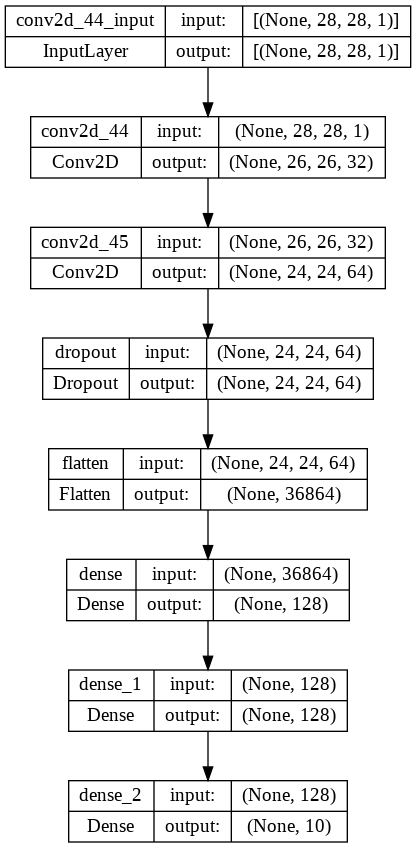

In [ ]:
# Plot model 
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [ ]:
# Compile the model
model.compile(
  'adam',                             # Optimizer: Adam for gradient descent-based: https://keras.io/api/optimizers/
  loss='categorical_crossentropy',    # Loss function: Categorical for 10 classes: https://keras.io/api/losses/
  metrics=['accuracy'],               # accuracy metric, can choose from keras metrics: https://keras.io/api/metrics/
)

In [ ]:
# Train the mdoel
# https://keras.io/api/callbacks/

epochs = 10

# Saving the model during training to be used later
checkpoint = ModelCheckpoint("mnist_best_model.hdf5",  # saving the best model
                            monitor='val_loss', verbose=1,
                            save_weights_only = False, # if True, then only the model's weights will be saved (model.save_weights(filepath)), else the full model is saved (model.save(filepath)). 
                            save_best_only=True,       # only saves when the model is considered the "best" and the latest best model according to the quantity monitored will not be overwritten.
                            mode='auto',               # the decision to overwrite the current save file is made based on either the maximization or the minimization of the monitored quantity. For val_acc, this should be max, for val_loss this should be min,
                            save_freq = 'epoch')       # When using 'epoch', the callback saves the model after each epoch. When using integer, the callback saves the model at end of this many batches.


In [ ]:
# Fitting the model
history = model.fit(
  train_images,
  train_labels, 
  epochs=epochs,                # number of training epochs
  batch_size=batch_size,
  verbose = 1,
  validation_data=(test_images, test_labels), # validation data
  callbacks=[checkpoint]      # callback to save the model during trainings 
)

Epoch 1/10
938/938 [==============================] - ETA: 0s - loss: 0.3891 - accuracy: 0.8585
Epoch 1: val_loss improved from inf to 0.30261, saving model to mnist_best_model.hdf5
938/938 [==============================] - 10s 10ms/step - loss: 0.3891 - accuracy: 0.8585 - val_loss: 0.3026 - val_accuracy: 0.8884
Epoch 2/10
548/938 [================>.............] - ETA: 3s - loss: 0.2578 - accuracy: 0.9059

In [ ]:
# availale keys in history
print(history.history.keys())

In [ ]:
# plot training history
plt.figure(figsize=(8,8))

# History for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# History for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
max(history.history['val_accuracy'])

In [ ]:
# Define confusion matrix
def calc_error(predictions, labels):
    """Return the error rate and confusions."""
    correct = np.sum(predictions == labels)
    total = predictions.shape[0]

    error = 100.0 - (100 * float(correct) / float(total))

    confusions = np.zeros([10, 10], np.float32)
    bundled = zip(predictions, labels)
    for predicted, actual in bundled:
        confusions[predicted, actual] += 1
    
    return error, confusions

In [ ]:
# Model predictions and confusion matrix
test_predictions          = np.argmax(model.predict(test_images),1)
test_error, test_conf_mat = calc_error(test_predictions, np.argmax(test_labels,1))
print('Test error: %.1f%%' % test_error)

plt.figure(figsize=(6, 6))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(False)
plt.xticks(np.arange(num_classes))
plt.yticks(np.arange(num_classes))
plt.imshow(test_conf_mat, cmap=plt.cm.jet, interpolation='nearest');

for i, cas in enumerate(test_conf_mat):
    for j, count in enumerate(cas):
        if count > 0:
            xoff = .07 * len(str(count))
            plt.text(j-xoff, i+.2, int(count), fontsize=9, color='white')

# CNN With maxpooling layer


2:91.8
3:91.6
4:95.20

In [ ]:
num_filters = 8
filter_size = 5
pool_size   = 4
num_classes = 10
batch_size  = 64
input_shape = (train_images.shape[1:]) # (28, 28, 1)
strides     = 1
padding     = 'valid' # valid: no padding, same: for zeros evenly right/left and up/down. 
                      # When padding="same" and strides=1, the output has the same size as the input
model = Sequential()
model.add(Conv2D(filters = 4 * num_filters,
                 kernel_size = filter_size,
                 strides     = strides,
                 input_shape = input_shape,
                 padding     = padding,
                 activation  = 'relu')) # Sequential model needs the input shape
model.add(MaxPooling2D(pool_size=pool_size)) # Keras automatically infers the shapes of inputs of later layers

model.add(Conv2D(filters = 8 * num_filters, kernel_size = (filter_size, filter_size)))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Dropout(0.25)) # randomly sets input units to 0 with a frequency of rate at each step during training time, to avoid overfitting
model.add(Flatten()) # Flatten serves as a connection between the convolution and dense layers
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes, activation='softmax')) # output layer



In [ ]:
# Summary of the model 
model.summary()

In [ ]:
#model_2.summary()

In [ ]:
# Plot model 
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [ ]:
# Compile the model
model.compile(
  'adam',                             # Optimizer: Adam for gradient descent-based: https://keras.io/api/optimizers/
  loss='categorical_crossentropy',    # Loss function: Categorical for 10 classes: https://keras.io/api/losses/
  metrics=['accuracy'],               # accuracy metric, can choose from keras metrics: https://keras.io/api/metrics/
)

In [ ]:
# Train the mdoel
# https://keras.io/api/callbacks/

epochs = 30

# Saving the model during training to be used later
checkpoint = ModelCheckpoint("mnist_best_model.hdf5",  # saving the best model
                            monitor='val_loss', verbose=1,
                            save_weights_only = False, # if True, then only the model's weights will be saved (model.save_weights(filepath)), else the full model is saved (model.save(filepath)). 
                            save_best_only=True,       # only saves when the model is considered the "best" and the latest best model according to the quantity monitored will not be overwritten.
                            mode='auto',               # the decision to overwrite the current save file is made based on either the maximization or the minimization of the monitored quantity. For val_acc, this should be max, for val_loss this should be min,
                            save_freq = 'epoch')       # When using 'epoch', the callback saves the model after each epoch. When using integer, the callback saves the model at end of this many batches.


In [ ]:
# Fitting the model
history = model.fit(
  train_images,
  train_labels, 
  epochs=epochs,                # number of training epochs
  batch_size=batch_size,
  verbose = 1,
  validation_data=(test_images, test_labels), # validation data
  callbacks=[checkpoint]      # callback to save the model during trainings 
)

In [ ]:
# availale keys in history
print(history.history.keys())

In [ ]:
# plot training history
plt.figure(figsize=(8,8))

# History for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# History for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
max(history.history['val_accuracy'])

In [ ]:
# Define confusion matrix
def calc_error(predictions, labels):
    """Return the error rate and confusions."""
    correct = np.sum(predictions == labels)
    total = predictions.shape[0]

    error = 100.0 - (100 * float(correct) / float(total))

    confusions = np.zeros([10, 10], np.float32)
    bundled = zip(predictions, labels)
    for predicted, actual in bundled:
        confusions[predicted, actual] += 1
    
    return error, confusions

In [ ]:
# Model predictions and confusion matrix
test_predictions          = np.argmax(model.predict(test_images),1)
test_error, test_conf_mat = calc_error(test_predictions, np.argmax(test_labels,1))
print('Test error: %.1f%%' % test_error)

plt.figure(figsize=(6, 6))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(False)
plt.xticks(np.arange(num_classes))
plt.yticks(np.arange(num_classes))
plt.imshow(test_conf_mat, cmap=plt.cm.jet, interpolation='nearest');

for i, cas in enumerate(test_conf_mat):
    for j, count in enumerate(cas):
        if count > 0:
            xoff = .07 * len(str(count))
            plt.text(j-xoff, i+.2, int(count), fontsize=9, color='white')

# hyperparameters



## model with padding

In [ ]:
num_filters = 8
filter_size = 3
pool_size   = 2
num_classes = 10
batch_size  = 64
input_shape = (train_images.shape[1:]) # (28, 28, 1)
strides     = 1
padding     = 'valid' # valid: no padding, same: for zeros evenly right/left and up/down. 
                      # When padding="same" and strides=1, the output has the same size as the input

In [ ]:

#padding
#model 2
# Different syntax, different padding
model_2 = Sequential([
  Conv2D(filters = 4 * num_filters, kernel_size = filter_size,strides = strides, input_shape=(28, 28, 1), padding='same', activation='relu'), 
  MaxPooling2D(pool_size=pool_size), 
  Conv2D(8 * num_filters, kernel_size=(filter_size, filter_size),strides = strides, padding='same',activation='relu'),  
  MaxPooling2D(pool_size=(pool_size, pool_size)), 
  Dropout(0.25),                        
  Flatten(),
  Dense(128,activation='relu'),
  Dense(128,activation='relu'),
  Dense(num_classes, activation='softmax'),
])

In [ ]:
model_2.summary()

In [ ]:
# Plot model 
keras.utils.plot_model(model_2, "my_mnist_model.png", show_shapes=True)

In [ ]:
model_2.compile(
  'adam',                             # Optimizer: Adam for gradient descent-based: https://keras.io/api/optimizers/
  loss='categorical_crossentropy',    # Loss function: Categorical for 10 classes: https://keras.io/api/losses/
  metrics=['accuracy'],               # accuracy metric, can choose from keras metrics: https://keras.io/api/metrics/
)

In [ ]:
# Train the mdoel
# https://keras.io/api/callbacks/

epochs = 30

# Saving the model during training to be used later
checkpoint = ModelCheckpoint("mnist_best_model.hdf5",  # saving the best model
                            monitor='val_loss', verbose=1,
                            save_weights_only = False, # if True, then only the model's weights will be saved (model.save_weights(filepath)), else the full model is saved (model.save(filepath)). 
                            save_best_only=True,       # only saves when the model is considered the "best" and the latest best model according to the quantity monitored will not be overwritten.
                            mode='auto',               # the decision to overwrite the current save file is made based on either the maximization or the minimization of the monitored quantity. For val_acc, this should be max, for val_loss this should be min,
                            save_freq = 'epoch')       # When using 'epoch', the callback saves the model after each epoch. When using integer, the callback saves the model at end of this many batches.


In [ ]:
# Fitting the model
history = model_2.fit(
  train_images,
  train_labels, 
  epochs=epochs,                # number of training epochs
  batch_size=batch_size,
  verbose = 1,
  validation_data=(test_images, test_labels), # validation data
  callbacks=[checkpoint]      # callback to save the model during trainings 
)

In [ ]:
# availale keys in history
print(history.history.keys())



In [ ]:
# plot training history
plt.figure(figsize=(8,8))

# History for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# History for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## kernal size

### kernal size:2,3,4,5,6,7,8, with padding, it would not change much
1:89.50
3:92.66
5:92.77
7:92.04
9:92.19

In [ ]:
num_filters = 8
filter_size = 5
pool_size   = 2
num_classes = 10
batch_size  = 64
input_shape = (train_images.shape[1:]) # (28, 28, 1)
strides     = 1


In [ ]:

#with padding
#model 2
# Different syntax, different padding
model_2 = Sequential([
  Conv2D(filters = 4 * num_filters, kernel_size = filter_size,strides = strides, input_shape=(28, 28, 1), padding='same', activation='relu'), 
  MaxPooling2D(pool_size=pool_size), 
  Conv2D(8 * num_filters, kernel_size=(filter_size, filter_size),strides = strides, padding='same',activation='relu'),  
  MaxPooling2D(pool_size=(pool_size, pool_size)), 
  Dropout(0.55),                        
  Flatten(),
  Dense(128,activation='relu'),
  Dense(128,activation='relu'),
  Dense(num_classes, activation='softmax'),
])

In [ ]:
model_2.compile(
  'adam',                             # Optimizer: Adam for gradient descent-based: https://keras.io/api/optimizers/
  loss='categorical_crossentropy',    # Loss function: Categorical for 10 classes: https://keras.io/api/losses/
  metrics=['accuracy'],               # accuracy metric, can choose from keras metrics: https://keras.io/api/metrics/
)

In [ ]:
# Plot model 
keras.utils.plot_model(model_2, "my_mnist_model.png", show_shapes=True)

In [ ]:
# Train the mdoel
# https://keras.io/api/callbacks/

epochs = 30

# Saving the model during training to be used later
checkpoint = ModelCheckpoint("mnist_best_model.hdf5",  # saving the best model
                            monitor='val_loss', verbose=1,
                            save_weights_only = False, # if True, then only the model's weights will be saved (model.save_weights(filepath)), else the full model is saved (model.save(filepath)). 
                            save_best_only=True,       # only saves when the model is considered the "best" and the latest best model according to the quantity monitored will not be overwritten.
                            mode='auto',               # the decision to overwrite the current save file is made based on either the maximization or the minimization of the monitored quantity. For val_acc, this should be max, for val_loss this should be min,
                            save_freq = 'epoch')

In [ ]:
# Fitting the model
history = model_2.fit(
  train_images,
  train_labels, 
  epochs=epochs,                # number of training epochs
  batch_size=batch_size,
  verbose = 1,
  validation_data=(test_images, test_labels), # validation data
  callbacks=[checkpoint]      # callback to save the model during trainings 
)

In [ ]:
# availale keys in history
print(history.history.keys())

In [ ]:
# plot training history
plt.figure(figsize=(8,8))

# History for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# History for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
max(history.history['val_accuracy'])

In [ ]:
# Define confusion matrix
def calc_error(predictions, labels):
    """Return the error rate and confusions."""
    correct = np.sum(predictions == labels)
    total = predictions.shape[0]

    error = 100.0 - (100 * float(correct) / float(total))

    confusions = np.zeros([10, 10], np.float32)
    bundled = zip(predictions, labels)
    for predicted, actual in bundled:
        confusions[predicted, actual] += 1
    
    return error, confusions

In [ ]:
# Model predictions and confusion matrix
test_predictions          = np.argmax(model_2.predict(test_images),1)
test_error, test_conf_mat = calc_error(test_predictions, np.argmax(test_labels,1))
test_acc = 100-test_error
print('Test error: %.2f%%' % test_error)
print('Test acc: %.2f%%' % test_acc)

plt.figure(figsize=(6, 6))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(False)
plt.xticks(np.arange(num_classes))
plt.yticks(np.arange(num_classes))
plt.imshow(test_conf_mat, cmap=plt.cm.jet, interpolation='nearest');

for i, cas in enumerate(test_conf_mat):
    for j, count in enumerate(cas):
        if count > 0:
            xoff = .07 * len(str(count))
            plt.text(j-xoff, i+.2, int(count), fontsize=9, color='white')

### kernal size without padding

1：0.8883
3:91.33
5：92.13
7:90.89
9：0.9059












In [ ]:
num_filters = 8
filter_size = 1
pool_size   = 2
num_classes = 10
batch_size  = 64
input_shape = (train_images.shape[1:]) # (28, 28, 1)
strides     = 1

In [ ]:
#model 2
# Different syntax, different padding
model_2 = Sequential([
  Conv2D(filters = 4 * num_filters, kernel_size = filter_size,strides = strides, input_shape=(28, 28, 1), padding='valid', activation='relu'), 
  MaxPooling2D(pool_size=pool_size), 
  Conv2D(8 * num_filters, kernel_size=(filter_size, filter_size),strides = strides, padding='valid',activation='relu'),  
  MaxPooling2D(pool_size=(pool_size, pool_size)), 
  Dropout(0.25),                        
  Flatten(),
  Dense(128,activation='relu'),
  Dense(128,activation='relu'),
  Dense(num_classes, activation='softmax'),
])

In [ ]:
model_2.compile(
  'adam',                             # Optimizer: Adam for gradient descent-based: https://keras.io/api/optimizers/
  loss='categorical_crossentropy',    # Loss function: Categorical for 10 classes: https://keras.io/api/losses/
  metrics=['accuracy'],               # accuracy metric, can choose from keras metrics: https://keras.io/api/metrics/
)

In [ ]:
# Train the mdoel
# https://keras.io/api/callbacks/

epochs = 30

# Saving the model during training to be used later
checkpoint = ModelCheckpoint("mnist_best_model.hdf5",  # saving the best model
                            monitor='val_loss', verbose=1,
                            save_weights_only = False, # if True, then only the model's weights will be saved (model.save_weights(filepath)), else the full model is saved (model.save(filepath)). 
                            save_best_only=True,       # only saves when the model is considered the "best" and the latest best model according to the quantity monitored will not be overwritten.
                            mode='auto',               # the decision to overwrite the current save file is made based on either the maximization or the minimization of the monitored quantity. For val_acc, this should be max, for val_loss this should be min,
                            save_freq = 'epoch')

In [ ]:
# Fitting the model
history = model_2.fit(
  train_images,
  train_labels, 
  epochs=epochs,                # number of training epochs
  batch_size=batch_size,
  verbose = 1,
  validation_data=(test_images, test_labels), # validation data
  callbacks=[checkpoint]      # callback to save the model during trainings 
)

In [ ]:
# availale keys in history
print(history.history.keys())

In [ ]:
# plot training history
plt.figure(figsize=(8,8))

# History for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# History for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Define confusion matrix
def calc_error(predictions, labels):
    """Return the error rate and confusions."""
    correct = np.sum(predictions == labels)
    total = predictions.shape[0]

    error = 100.0 - (100 * float(correct) / float(total))

    confusions = np.zeros([10, 10], np.float32)
    bundled = zip(predictions, labels)
    for predicted, actual in bundled:
        confusions[predicted, actual] += 1
    
    return error, confusions

In [ ]:
# Model predictions and confusion matrix
test_predictions          = np.argmax(model_2.predict(test_images),1)
test_error, test_conf_mat = calc_error(test_predictions, np.argmax(test_labels,1))
print('Test error: %.1f%%' % test_error)

plt.figure(figsize=(6, 6))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(False)
plt.xticks(np.arange(num_classes))
plt.yticks(np.arange(num_classes))
plt.imshow(test_conf_mat, cmap=plt.cm.jet, interpolation='nearest');

for i, cas in enumerate(test_conf_mat):
    for j, count in enumerate(cas):
        if count > 0:
            xoff = .07 * len(str(count))
            plt.text(j-xoff, i+.2, int(count), fontsize=9, color='white')

# stride

stride:


1.   1:0.9259
2.   2:0.9144
3.   3:0.9025



In [ ]:
num_filters = 8
filter_size = 5
pool_size   = 2
num_classes = 10
batch_size  = 64
input_shape = (train_images.shape[1:]) # (28, 28, 1)
strides     = 3
padding     = 'valid' # valid: no padding, same: for zeros evenly right/left and up/down. 
                      # When padding="same" and strides=1, the output has the same size as the input

In [ ]:
#padding
#model 2
# Different syntax, different padding
model_2 = Sequential([
  Conv2D(filters = 4 * num_filters, kernel_size = filter_size,strides = strides, input_shape=(28, 28, 1), padding='same', activation='relu'), 
  MaxPooling2D(pool_size=pool_size), 
  Conv2D(8 * num_filters, kernel_size=(filter_size, filter_size),strides = strides, padding='same',activation='relu'),  
  MaxPooling2D(pool_size=(pool_size, pool_size)), 
  Dropout(0.25),                        
  Flatten(),
  Dense(128,activation='relu'),
  Dense(128,activation='relu'),
  Dense(num_classes, activation='softmax'),
])

In [ ]:
model_2.summary()

In [ ]:
model_2.compile(
  'adam',                             # Optimizer: Adam for gradient descent-based: https://keras.io/api/optimizers/
  loss='categorical_crossentropy',    # Loss function: Categorical for 10 classes: https://keras.io/api/losses/
  metrics=['accuracy'],               # accuracy metric, can choose from keras metrics: https://keras.io/api/metrics/
)

In [ ]:
epochs = 30

# Saving the model during training to be used later
checkpoint = ModelCheckpoint("mnist_best_model.hdf5",  # saving the best model
                            monitor='val_loss', verbose=1,
                            save_weights_only = False, # if True, then only the model's weights will be saved (model.save_weights(filepath)), else the full model is saved (model.save(filepath)). 
                            save_best_only=True,       # only saves when the model is considered the "best" and the latest best model according to the quantity monitored will not be overwritten.
                            mode='auto',               # the decision to overwrite the current save file is made based on either the maximization or the minimization of the monitored quantity. For val_acc, this should be max, for val_loss this should be min,
                            save_freq = 'epoch')       # When using 'epoch', the callback saves the model after each epoch. When using integer, the callback saves the model at end of this many batches.


In [ ]:
# Fitting the model
history = model_2.fit(
  train_images,
  train_labels, 
  epochs=epochs,                # number of training epochs
  batch_size=batch_size,
  verbose = 1,
  validation_data=(test_images, test_labels), # validation data
  callbacks=[checkpoint]      # callback to save the model during trainings 
)

In [ ]:
# availale keys in history
print(history.history.keys())


In [ ]:
# plot training history
plt.figure(figsize=(8,8))

# History for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# History for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
max(history.history['val_accuracy'])

# training size

0:0.10
1:0.3754
2:0.6893
3:0.8283
4:0.8968

different training set

In [ ]:
from sklearn import model_selection
#test size = val size
train_x1,valid_x,train_y1,valid_y = model_selection.train_test_split(train_images, train_labels, train_size=1,random_state=1, shuffle=True)
train_x2,valid_x,train_y2,valid_y = model_selection.train_test_split(train_images, train_labels, train_size=10,random_state=1, shuffle=True)
train_x3,valid_x,train_y3,valid_y = model_selection.train_test_split(train_images, train_labels, train_size=100,random_state=1, shuffle=True)
train_x4,valid_x,train_y4,valid_y = model_selection.train_test_split(train_images, train_labels, train_size=1000,random_state=1, shuffle=True)
train_x5,valid_x,train_y5,valid_y = model_selection.train_test_split(train_images, train_labels, train_size=10000,random_state=1, shuffle=True)

In [ ]:
train_y1

In [ ]:
num_filters = 8
filter_size = 5
pool_size   = 2
num_classes = 10
batch_size  = 64
input_shape = (train_x5.shape[1:]) # (28, 28, 1)
strides     = 1
input_shape

In [ ]:
#with padding
#model 2
# Different syntax, different padding
model_2 = Sequential([
  Conv2D(filters = 4 * num_filters, kernel_size = filter_size,strides = strides, input_shape=(28, 28, 1), padding='same', activation='relu'), 
  MaxPooling2D(pool_size=pool_size), 
  Conv2D(8 * num_filters, kernel_size=(filter_size, filter_size),strides = strides, padding='same',activation='relu'),  
  MaxPooling2D(pool_size=(pool_size, pool_size)), 
  Dropout(0.25),                        
  Flatten(),
  Dense(128,activation='relu'),
  Dense(128,activation='relu'),
  Dense(num_classes, activation='softmax'),
])

In [ ]:
model_2.compile(
  'adam',                             # Optimizer: Adam for gradient descent-based: https://keras.io/api/optimizers/
  loss='categorical_crossentropy',    # Loss function: Categorical for 10 classes: https://keras.io/api/losses/
  metrics=['accuracy'],               # accuracy metric, can choose from keras metrics: https://keras.io/api/metrics/
)

In [ ]:
# Train the mdoel
# https://keras.io/api/callbacks/

epochs = 30

# Saving the model during training to be used later
checkpoint = ModelCheckpoint("mnist_best_model.hdf5",  # saving the best model
                            monitor='val_loss', verbose=1,
                            save_weights_only = False, # if True, then only the model's weights will be saved (model.save_weights(filepath)), else the full model is saved (model.save(filepath)). 
                            save_best_only=True,       # only saves when the model is considered the "best" and the latest best model according to the quantity monitored will not be overwritten.
                            mode='auto',               # the decision to overwrite the current save file is made based on either the maximization or the minimization of the monitored quantity. For val_acc, this should be max, for val_loss this should be min,
                            save_freq = 'epoch')

In [ ]:
history = model_2.fit(
  train_x5,
  train_y5, 
  epochs=epochs,                # number of training epochs
  batch_size=batch_size,
  verbose = 1,
  validation_data=(test_images, test_labels), # validation data
  callbacks=[checkpoint]      # callback to save the model during trainings 
)

In [ ]:
# plot training history
plt.figure(figsize=(8,8))

# History for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# History for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
max(history.history['val_accuracy'])

# drop out


1.   0.0:92.18
2.   0.1:92.31
3.   0.2:92.31
4.   0.3:92.58
5.   0.4:92.57
6.   0.5:92.70
7.   0.6:92.74
8.   0.7:92.69
9.   0.8:92.5
10.  0.9:91.11
11. 0.99:0.7971






In [ ]:
num_filters = 8
filter_size = 5
pool_size   = 2
num_classes = 10
batch_size  = 64
input_shape = (train_images.shape[1:]) # (28, 28, 1)
strides     = 1

In [ ]:
#with padding
#model 2
# Different syntax, different padding
model_2 = Sequential([
  Conv2D(filters = 4 * num_filters, kernel_size = filter_size,strides = strides, input_shape=(28, 28, 1), padding='same', activation='relu'), 
  MaxPooling2D(pool_size=pool_size), 
  Conv2D(8 * num_filters, kernel_size=(filter_size, filter_size),strides = strides, padding='same',activation='relu'),  
  MaxPooling2D(pool_size=(pool_size, pool_size)), 
  Dropout(0.99),                        
  Flatten(),
  Dense(128,activation='relu'),
  Dense(128,activation='relu'),
  Dense(num_classes, activation='softmax'),
])

In [ ]:
model_2.compile(
  'adam',                             # Optimizer: Adam for gradient descent-based: https://keras.io/api/optimizers/
  loss='categorical_crossentropy',    # Loss function: Categorical for 10 classes: https://keras.io/api/losses/
  metrics=['accuracy'],               # accuracy metric, can choose from keras metrics: https://keras.io/api/metrics/
)

In [ ]:
# Train the mdoel
# https://keras.io/api/callbacks/

epochs = 30

# Saving the model during training to be used later
checkpoint = ModelCheckpoint("mnist_best_model.hdf5",  # saving the best model
                            monitor='val_loss', verbose=1,
                            save_weights_only = False, # if True, then only the model's weights will be saved (model.save_weights(filepath)), else the full model is saved (model.save(filepath)). 
                            save_best_only=True,       # only saves when the model is considered the "best" and the latest best model according to the quantity monitored will not be overwritten.
                            mode='auto',               # the decision to overwrite the current save file is made based on either the maximization or the minimization of the monitored quantity. For val_acc, this should be max, for val_loss this should be min,
                            save_freq = 'epoch')

In [ ]:
# Fitting the model
history = model_2.fit(
  train_images,
  train_labels, 
  epochs=epochs,                # number of training epochs
  batch_size=batch_size,
  verbose = 1,
  validation_data=(test_images, test_labels), # validation data
  callbacks=[checkpoint]      # callback to save the model during trainings 
)

Epoch 1/30
938/938 [==============================] - ETA: 0s - loss: 1.5199 - accuracy: 0.3963
Epoch 1: val_loss improved from inf to 0.90718, saving model to mnist_best_model.hdf5
938/938 [==============================] - 6s 5ms/step - loss: 1.5199 - accuracy: 0.3963 - val_loss: 0.9072 - val_accuracy: 0.6585
Epoch 2/30
930/938 [============================>.] - ETA: 0s - loss: 1.1499 - accuracy: 0.5416
Epoch 2: val_loss improved from 0.90718 to 0.76747, saving model to mnist_best_model.hdf5
938/938 [==============================] - 4s 5ms/step - loss: 1.1486 - accuracy: 0.5421 - val_loss: 0.7675 - val_accuracy: 0.7441
Epoch 3/30
929/938 [============================>.] - ETA: 0s - loss: 1.0582 - accuracy: 0.5829
Epoch 3: val_loss improved from 0.76747 to 0.72568, saving model to mnist_best_model.hdf5
938/938 [==============================] - 5s 5ms/step - loss: 1.0580 - accuracy: 0.5830 - val_loss: 0.7257 - val_accuracy: 0.7515
Epoch 4/30
933/938 [============================>.] -

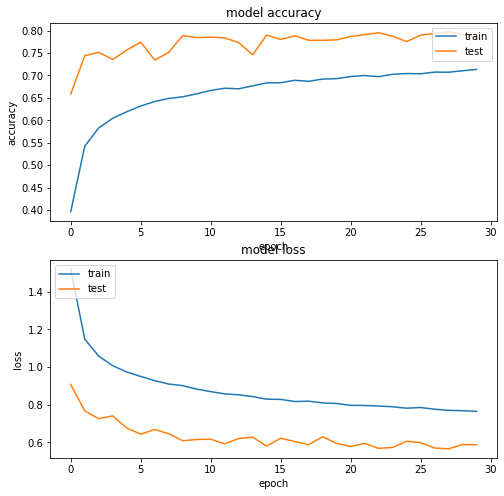

In [ ]:
# plot training history
plt.figure(figsize=(8,8))

# History for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# History for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
max(history.history['val_accuracy'])

0.7971000075340271

# **MLP Implementation**

In [ ]:
class NeuralNetLayer:
    def __init__(self):
        self.gradient = None
        self.parameters = None
        
    def forward(self, x):
        raise NotImplementedError

    def backward(self, gradient):
        raise NotImplementedError

    def check_grad(self,x,target):
        raise NotImplementedError

In [ ]:
class LinearLayer(NeuralNetLayer):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.ni = input_size
        self.no = output_size
        self.w=np.random.normal(0,0.1,(output_size,input_size))
        self.b = np.random.randn(output_size)
        self.cur_input = None
        self.parameters = [self.w, self.b]

    def forward(self, x):
        self.cur_input = x
        a=(self.w[None, :, :] @ x[:, :, None]).squeeze() + self.b
        #print(a)
        return a
    def backward(self, gradient): #put 1 if starts from the toppest
        assert self.cur_input is not None, "Must call forward before backward"
        #dw = gradient.dot(self.cur_input)
        dw = gradient[:, :, None] @ self.cur_input[:, None, :]
        db = gradient
        self.gradient = [dw, db]
       # print("Linear Layer backpropagating")
        return gradient.dot(self.w)
    
    def check_grad(self,x,target):
      diff=check_grad(self.forward(x), self.backward(target), [1.5, -1.5])
      print(diff)
      return diff

In [ ]:
class ReLULayer(NeuralNetLayer):
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        #print(x)
        self.gradient = np.where(x > 0, 1.0, 0.0)
       # print("ReLU is executing")
        return np.maximum(0, x)

    def backward(self, gradient):
        assert self.gradient is not None, "Must call forward before backward"
       # print("ReLU backpropagating")
        #print(gradient*self.gradient)
        return gradient * self.gradient
    
    def check_grad(self,x,target):
      diff=check_grad(self.forward(x), self.backward(target), [1.5, -1.5])
      print(diff)
      return diff

In [ ]:
class SoftmaxOutputLayer(NeuralNetLayer):
    def __init__(self):
        super().__init__()
        self.cur_probs = None

    def forward(self, x):
       # print(x)
        x=np.subtract(x,x.max())
        exps = np.exp(x)
        probs = exps / np.sum(exps, axis=-1)[:, None]
        self.cur_probs = probs
       # print("Softmax executing")
        return probs

    def backward(self, target):
        assert self.cur_probs is not None, "Must call forward before backward"
       # print("Softmax backpropagating")
        return self.cur_probs - target

    def check_grad(self,x,target):
      diff=check_grad(self.forward(x), self.backward(target), [1.5, -1.5])
      print(diff)
      return diff

In [ ]:
from tensorflow.python.ops.math_ops import batch_mat_mul
from scipy.optimize import check_grad

#define activation function

ReLU = lambda z : np.maximum(z, 0)
tanh = lambda z : np.tanh(z)
Leaky_ReLU = lambda z : np.maximum(z, 0) + 0.01*np.minimum(0,z)
softmax = lambda z: np.exp(z) / np.sum(np.exp(z), axis=0)

class MLP:
   def __init__(self,sizes,activation_func,hidden_layers,units): #size[input,output]
     self.num_layers=hidden_layers
     self.sizes=sizes
     #self.W = [np.random.randn(n,m)*np.sqrt(2/(m+n)) for m,n in zip(sizes[:-1], sizes[1:])] 
     #self.biases = [np.random.randn(n,1) for n in sizes[1:]]
     self.activation_func = activation_func
     #maybe add a list to store the layers
     self.layers_list=[]
     self.activation_layer=None
     if self.activation_func == 'ReLU':
         self.activation_layer=ReLULayer()
     elif self.activation_func == 'tanh':
         self.activation_layer = TanhLayer()
     elif self.activation_func == 'Leaky-ReLU':
         self.activation_layer=Leaky_ReLULayer()

     if self.num_layers==0:
           self.layers_list.append(LinearLayer(self.sizes[0],self.sizes[1]))
           self.layers_list.append(SoftmaxOutputLayer())
     elif self.num_layers==1:
           self.layers_list.append(LinearLayer(self.sizes[0],units))
           self.layers_list.append(self.activation_layer)
           self.layers_list.append(LinearLayer(units,self.sizes[1]))
           self.layers_list.append(SoftmaxOutputLayer())
     elif self.num_layers==2:
           self.layers_list.append(LinearLayer(self.sizes[0],units))
           self.layers_list.append(self.activation_layer)
           self.layers_list.append(LinearLayer(units,units))
           self.layers_list.append(self.activation_layer)
           self.layers_list.append(LinearLayer(units,self.sizes[1]))
           self.layers_list.append(SoftmaxOutputLayer())
     elif self.num_layers==3:
           self.layers_list.append(LinearLayer(self.sizes[0],units))
           self.layers_list.append(self.activation_layer)
           self.layers_list.append(LinearLayer(units,units))
           self.layers_list.append(self.activation_layer)
           self.layers_list.append(LinearLayer(units,units))
           self.layers_list.append(self.activation_layer)
           self.layers_list.append(LinearLayer(units,self.sizes[1]))
           self.layers_list.append(SoftmaxOutputLayer())
     elif self.num_layers==4:
           self.layers_list.append(LinearLayer(self.sizes[0],units))
           self.layers_list.append(self.activation_layer)
           self.layers_list.append(LinearLayer(units,units))
           self.layers_list.append(self.activation_layer)
           self.layers_list.append(LinearLayer(units,self.sizes[1]))
           self.layers_list.append(self.activation_layer)
           self.layers_list.append(LinearLayer(units,self.sizes[2]))
           self.layers_list.append(self.activation_layer)
           self.layers_list.append(LinearLayer(units,self.sizes[3]))
           self.layers_list.append(SoftmaxOutputLayer())

   def forward(self, x):
        for layer in self.layers_list:
            x = layer.forward(x)
        return x

   def backward(self, target):
        for layer in self.layers_list[::-1]:
            target = layer.backward(target)

   def check_gradient(self,x,y):
     grad=[]
     #labels = np.eye(10)[np.array(y)]
     indices = np.random.choice(60000, 100)
     batch = x[indices]
     batch_label=np.eye(10)[np.array(y[indices])]
     for layer in self.layers_list:
       grad.append(layer.check_grad(batch,batch_label))
 

   def fit(self,optimizer, data_x, data_y,steps,x_test,y_test,batch_size=128):
        #losses = np.zeros(steps)
        losses=[]
        np.random.seed(551)
        training_accu=[]
        testing_accu=[]

        #print(valid_labels)
        for _ in tqdm(range(steps)):

          for i in range(data_x.shape[0] // batch_size):
            k = i*batch_size
            l = (i+1)*batch_size
            batch_label=np.eye(10)[np.array(data_y[k:l])]
            predictions = self.forward(data_x[k:l])
            loss = -(batch_label * np.log(predictions)).sum(axis=-1).mean()
            losses.append(loss) 
            self.backward(batch_label)
            optimizer.step()

          """
          indices = np.random.choice(data_x.shape[0], 100)
          batch = data_x[indices]
          batch_label=np.eye(10)[np.array(data_y[indices])]
          predictions = self.forward(batch)
          #print(predictions.max())        
          loss = -(batch_label * np.log(predictions)).sum(axis=-1).mean()          
          losses.append(loss)          
          self.backward(batch_label)
          optimizer.step()
          """
          training_accu.append(np.mean(self.predict(data_x)==data_y))
          testing_accu.append(np.mean(self.predict(x_test)==y_test))
        """
        training_pred=self.predict()
        training_acc=self.evaluate_acc(training_pred,data_y[indices])
        training_accu.append(training_acc)

        testing_pred=self.predict(x_test)
        testing_acc=self.evaluate_acc(testing_pred,y_test)
        testing_accu.append(testing_acc)
        """
          
          
        plt.plot(losses,label='learning rate'+str(optimizer.lr))
       
        plt.legend()
        plt.xlabel("Epoch")
        plt.ylabel("Cross entropy loss")
        return training_accu,testing_accu
        

   def predict(self,test):
        yh_all = np.argmax(self.forward(test), axis=-1)    
        return yh_all

   def evaluate_acc(self, predicted_ys, true_ys): 
        result = 0
        for predicted_y, true_y in zip(predicted_ys, true_ys):
            if predicted_y == true_y:
                result += 1
        return result/len(true_ys)

In [ ]:
class Optimizer:
    def __init__(self, net: MLP):
        self.net = net

    def step(self):
        for layer in self.net.layers_list[::-1]:
            if layer.parameters is not None:
                self.update(layer.parameters, layer.gradient)

    def update(self, params, gradient):
        raise NotImplementedError

class GradientDescentOptimizer(Optimizer):
    def __init__(self, net: MLP, lr: float,alpha:float):
        super().__init__(net)
        self.lr = lr
        self.alpha=alpha

    def update(self, params, gradient):
        for (p, g) in zip(params, gradient):
            p -= self.lr * (g.mean(axis=0)+self.alpha*p

In [ ]:
import random
np.random.seed(551)
from sklearn import model_selection
x_train=np.array(x_train,dtype=np.float128)
x_train1, x_valid, y_train1, y_valid = model_selection.train_test_split(x_train, y_train, test_size = 0.5, random_state=1, shuffle=True)

In [ ]:
x_train=np.array(x_train,dtype=np.float128)

np.random.seed(551)

mlp0=MLP([784,10],'ReLU',0,0)
opt1=GradientDescentOptimizer(mlp0, 1e-1,1e-2)

training_accu,testing_accu=mlp0.fit(opt1,x_train,y_train,8,x_test,y_test)

y_pred=mlp0.predict(x_test)
print(mlp0.evaluate_acc(y_pred,y_test))

In [ ]:
plt.plot(training_accu,label='training')
plt.plot(testing_accu,label='testing')
plt.title('MLP with no hidden layer')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("accuracy")

In [ ]:
mlp1=MLP([784,10],'ReLU',1,128)
opt2=GradientDescentOptimizer(mlp1, 0.1,0.01)

training_accu,testing_accu=mlp1.fit(opt2,x_train,y_train,8,x_test,y_test)

y_pred1=mlp1.predict(x_test)
print(mlp1.evaluate_acc(y_pred1,y_test))

In [ ]:
plt.plot(training_accu,label='training')
plt.plot(testing_accu,label='testing')
plt.title('MLP with one hidden layer')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("accuracy")

In [ ]:
mlp2=MLP([784,10],'ReLU',2,128)
opt3=GradientDescentOptimizer(mlp2, 0.1,0.01)
training_accu,testing_accu=mlp2.fit(opt3,x_train,y_train,8,x_test,y_test)

y_pred=mlp2.predict(x_test)
print(mlp2.evaluate_acc(y_pred,y_test))

In [ ]:
plt.plot(training_accu,label='training')
plt.plot(testing_accu,label='testing')
plt.title('MLP with two hidden layers')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("accuracy")

In [ ]:
#for activationn function is tanh
class TanhLayer(NeuralNetLayer):
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        self.gradient=1-np.tanh(x)*np.tanh(x)
        return np.tanh(x)

    def backward(self, gradient):
        assert self.gradient is not None, "Must call forward before backward"
       # print("ReLU backpropagating")
        return gradient * self.gradient
    
    def check_grad(self,x,target):
      return check_grad(self.forward(x), self.backward(target), [1.5, -1.5])

In [ ]:
#for activationn function is Leaky-ReLU
class Leaky_ReLULayer(NeuralNetLayer):
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        #print(x)
        self.gradient = np.where(x > 0, 1.0, 1e-2)
       # print("ReLU is executing")
        return np.maximum(0, x)+1e-2*np.minimum(0,x)

    def backward(self, gradient):
        assert self.gradient is not None, "Must call forward before backward"
       # print("ReLU backpropagating")
        return gradient * self.gradient
    
    def check_grad(self,x,target):
      return check_grad(self.forward(x), self.backward(target), [1.5, -1.5])

In [ ]:
mlp_tanh=MLP([784,10],'tanh',2,128)
opt4=GradientDescentOptimizer(mlp_tanh, 0.1,0.01)
train,test=mlp_tanh.fit(opt4,x_train,y_train,8,x_test,y_test)

y_pred=mlp_tanh.predict(x_test)
print(mlp_tanh.evaluate_acc(y_pred,y_test))

In [ ]:
plt.plot(train,label='training')
plt.plot(test,label='testing')
plt.title('MLP with two hidden layers using Tanh')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("accuracy")

In [ ]:
mlp_Leaky_ReLU=MLP([784,10],'Leaky-ReLU',2,128)
opt5=GradientDescentOptimizer(mlp_Leaky_ReLU, 0.1,0.01)
train,test=mlp_Leaky_ReLU.fit(opt5,x_train,y_train,8,x_test,y_test)

y_pred=mlp_Leaky_ReLU.predict(x_test)
print(mlp_Leaky_ReLU.evaluate_acc(y_pred,y_test))

In [ ]:
plt.plot(train,label='training')
plt.plot(test,label='testing')
plt.title('MLP with two hidden layers using Leaky-ReLU')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("accuracy")

In [ ]:
lambda_L2=[0.4,0.6,0.8]

for i in lambda_L2:
  mlp_L2=MLP([784,10],'ReLU',2,128)
  opt_L2=GradientDescentOptimizer(mlp_L2, 0.1,i)
  training_accu,testing_accu=mlp_L2.fit(opt_L2,x_train1,y_train1,8,x_valid,y_valid)

  y_pred=mlp_L2.predict(x_test)
  print(mlp_L2.evaluate_acc(y_pred,y_test))

In [ ]:
x_train_unnorm=np.array(x_train_unnorm,dtype=np.float128)
mlp_un=MLP([784,10],'ReLU',2,128)
opt_un=GradientDescentOptimizer(mlp_un, 1e-3,0.01)
training_accu,testing_accu=mlp_un.fit(opt_un,x_train_unnorm,y_train,8,x_test,y_test)

y_pred=mlp_un.predict(x_test_unnorm)
print(mlp_un.evaluate_acc(y_pred,y_test))

In [ ]:
plt.plot(training_accu,label='training')
plt.plot(testing_accu,label='testing')
plt.title('MLP with two hidden layers using unnormalized images')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("accuracy")

In [ ]:
table=['learning rate','hidden layers','training accuracy','validation accuracy']
#learning_rate=[0.1,0.05,0.01]
layer=[3]


for j in layer:
  mlp_q6=MLP([784,10],'ReLU',j,256)
  opt_q6=GradientDescentOptimizer(mlp_q6, 0.01,0.1)
  training_accu,testing_accu=mlp_q6.fit(opt_q6,x_train1,y_train1,8,x_valid,y_valid)
    
  row = []
  #row.append(learning_rate[i])
  #row.append(layer[j])
    #row.append(model.evaluate_acc(y_train_pred, y_train_split))
    #row.append(model.evaluate_acc(y_val_pred, y_val))
  table.append(j)

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

In [ ]:
tabel1=['L2 regularization','training accuracy','validation accuracy']
l2_regularization=[0.4,0.6,0.8]



for i in l2_regularization:
  mlp_q61=MLP([784,10],'ReLU',0,128)
  opt_q61=GradientDescentOptimizer(mlp_q61, 0.01,i)
  training_accu,testing_accu=mlp_q6.fit(opt_q61,x_train1,y_train1,8,x_valid,y_valid)
    
  row = []
  row.append(l2_regularization[i])
    
    #row.append(model.evaluate_acc(y_train_pred, y_train_split))
    #row.append(model.evaluate_acc(y_val_pred, y_val))
  table1.append(row.copy())

print(tabulate(table1, headers='firstrow', tablefmt='fancy_grid'))

In [ ]:
mlp2=MLP([784,10],'ReLU',2,256)
opt3=GradientDescentOptimizer(mlp2, 0.1,0.01)
training_accu,testing_accu=mlp2.fit(opt3,x_train,y_train,8,x_test,y_test)

y_pred=mlp2.predict(x_test)
print(mlp2.evaluate_acc(y_pred,y_test))

In [ ]:
plt.plot(training_accu,label='training')
plt.plot(testing_accu,label='testing')
plt.title('MLP with two hidden layers and 210 hidden units')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("accuracy")

In [ ]:
mlp2=MLP([784,10],'ReLU',2,64)
opt3=GradientDescentOptimizer(mlp2, 0.1,0.01)
training_accu,testing_accu=mlp2.fit(opt3,x_train,y_train,8,x_test,y_test)

y_pred=mlp2.predict(x_test)
print(mlp2.evaluate_acc(y_pred,y_test))

In [ ]:
plt.plot(training_accu,label='training')
plt.plot(testing_accu,label='testing')
plt.title('MLP with two hidden layers and 50 hidden units')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("accuracy")

In [ ]:
learning_rate=[0.01,0.05,0.1]

for i in learning_rate:
    mlp2=MLP([784,10],'ReLU',2,128)
    opt3=GradientDescentOptimizer(mlp2, i,0.01)
    _,_=mlp2.fit(opt3,x_train1,y_train1,8,x_valid,y_valid)
    y_pred=mlp2.predict(x_valid)
    acc=mlp2.evaluate_acc(y_pred,y_valid)
    print(acc)

In [ ]:
#splitting the data
train_x_0 = x_train1[:10**0]
train_y_0 = y_train1[:10**0]
valid_x_0 = x_valid[:10**0]
valid_y_0 = y_valid[:10**0]
train_x_1 = x_train1[:10**1]
train_y_1 = y_train1[:10**1]
train_x_2 = x_train1[:10**2]
train_y_2 = y_train1[:10**2]
train_x_3 = x_train1[:10**3]
train_y_3 = y_train1[:10**3]
train_x_4 = x_train1[:10**4]
train_y_4 = y_train1[:10**4]

In [ ]:
train_x_0=np.array(train_x_0,dtype=np.float128)

np.random.seed(551)

mlp_0=MLP([784,10],'ReLU',2,128)
opt_0=GradientDescentOptimizer(mlp_0, 0.1,0.01)

training_accu,valid_accu=mlp_0.fit(opt_0,train_x_0,train_y_0,8,valid_x_0,valid_y_0)

y_pred_0=mlp_0.predict(valid_x_0)
print(mlp_0.evaluate_acc(y_pred_0,valid_y_0))